#Settings

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# change working directory
%cd /content/gdrive/My Drive/UEA-IA/iris/

/content/gdrive/My Drive/UEA-IA/iris


#Exploration

In [46]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sns.set_theme()
%matplotlib inline

In [5]:
# Load dataset
columns = ['sepal_length',	'sepal_width',	'petal_length',	'petal_width',	'species']
df_iris = pd.read_csv('./dataset/iris.csv', names=columns)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Dataset information

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Categories
df_iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [8]:
# Null values
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Observações**:

*   O *dataset* possui 5 atributos, sendo o atributo alvo a *species* 
*   *species* possui 3 categorias divididas igualmente entre 150 instâncias: *setosa*, *virginica* e *versicolor*
*   *Iris dataset* não possui valores faltantes



##Visualization

[]

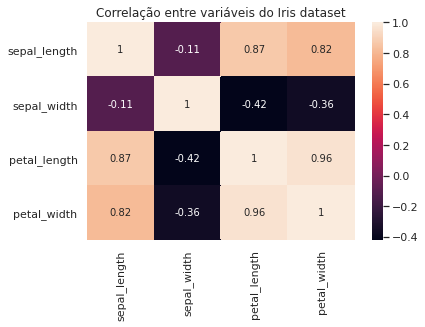

In [9]:
# Correlation between variables
sns.heatmap(df_iris.corr(),annot=True)
plt.title('Correlação entre variáveis do Iris dataset')
plt.plot()

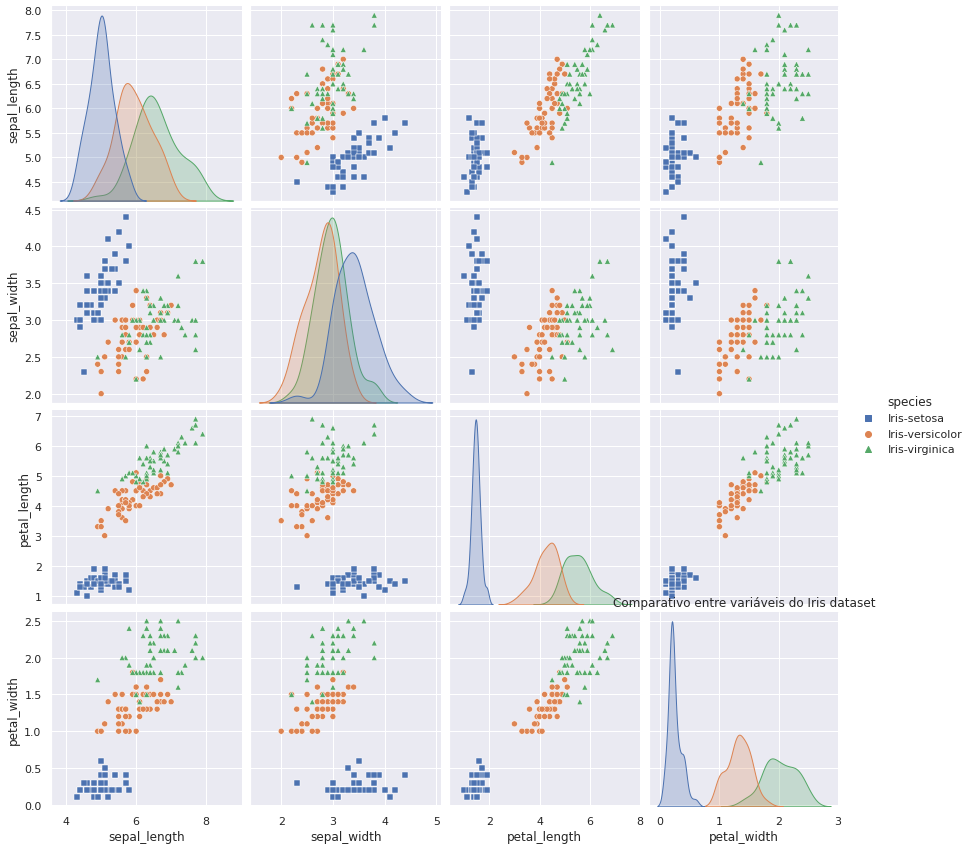

In [11]:
# Relation between variables
sns.pairplot(df_iris, hue="species", markers=['s', 'o', '^'], height=3)
plt.title('Comparativo entre variáveis do Iris dataset')
plt.show()

**Observações**

*   A largura e o comprimento da pétala estão correlacionados positivamente, ou seja, se a largura aumenta, o comprimento aumenta proporcionalmente.
*   A classe *setosa* (marcador azul) é linearmente separável das outras classes, ou seja, é simples prever uma íris-setosa. As classes *versicolo* e *virginica* possuem uma região onde os exemplos podem ser classificados como qualquer uma dessas duas classes.

##Evaluate Decision Tree

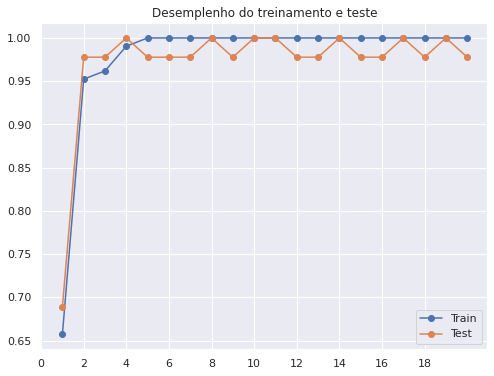

In [28]:
# Seperating and spliting the dataset 
X = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

# Training and evaluate
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
	model = DecisionTreeClassifier(max_depth=i, random_state=32)
	model.fit(X_train, y_train)
 
	train_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_pred)
	train_scores.append(train_acc)
 
	test_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_pred)
	test_scores.append(test_acc)
 
plt.figure(figsize=(8,6))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title('Desempenho do treinamento e teste')
plt.legend()
plt.xticks(np.arange(0, 20, 2))
plt.show()

In [43]:
# Decision Tree
for depth in range(1,6):
  model = DecisionTreeClassifier(max_depth=depth, random_state=32)
  model.fit(X_train, y_train)
  test_pred = model.predict(X_test)
  print(f'depth is {depth} and accuracy is {round(accuracy_score(test_pred,y_test),2)}')

depth is 1 and accuracy is 0.69
depth is 2 and accuracy is 0.98
depth is 3 and accuracy is 0.98
depth is 4 and accuracy is 1.0
depth is 5 and accuracy is 1.0


In [45]:
# Decision tree with max_depth=2
model = DecisionTreeClassifier(max_depth=2, random_state=32)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
print(f'Acurracy is {round(accuracy_score(test_pred,y_test),2)}')
print(classification_report(y_test, test_pred))

Acurracy is 0.98
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



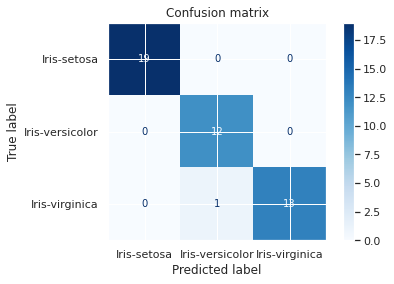

In [61]:
# Confusion matrix
class_names = df_iris.species.unique()

disp = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix')
plt.show()

#Results

In [ ]:
# commit
!git config --global user.email "mmmt.eng@uea.edu.br"
!git config --global user.name "Matheus Matos"
!git commit -am 'Avaliação do mod'